In [33]:
import pandas as pd
import requests
import os
import winsound

import numpy as np

from io import StringIO
pd.set_option("display.max_columns", 50)
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
# which style sheet to use 
style.use('ggplot')

# import ipywidgets library for creating widgets
import ipywidgets as widgets

import matplotlib.pyplot as plt  # Add this line to import matplotlib
from matplotlib.colors import LinearSegmentedColormap

from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [41]:


# Fájl beolvasása
file_path = r"C:\Users\rotar\OneDrive\Asztali gép\Cubix_Data_Challenge\SQL\MovieMasters\movie_master_clean.csv"
  # Adj meg helyes elérési utat
df = pd.read_csv(file_path, sep=';')

# Oszlopnevek megtekintése
print(df.columns)


Index(['film_id', 'imdb_id', 'title', 'duration_minutes', 'year_released',
       'genres', 'popularity', 'average_rating', 'production_cost',
       'box_office_revenue', 'actor1', 'actor2', 'actor3', 'director',
       'writer', 'production_company'],
      dtype='object')


C:\Users\rotar\AppData\Local\Temp\ipykernel_5088\2496083059.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["average_rating"].fillna(df["average_rating"].mean(), inplace=True)
C:\Users\rotar\AppData\Local\Temp\ipykernel_5088\2496083059.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

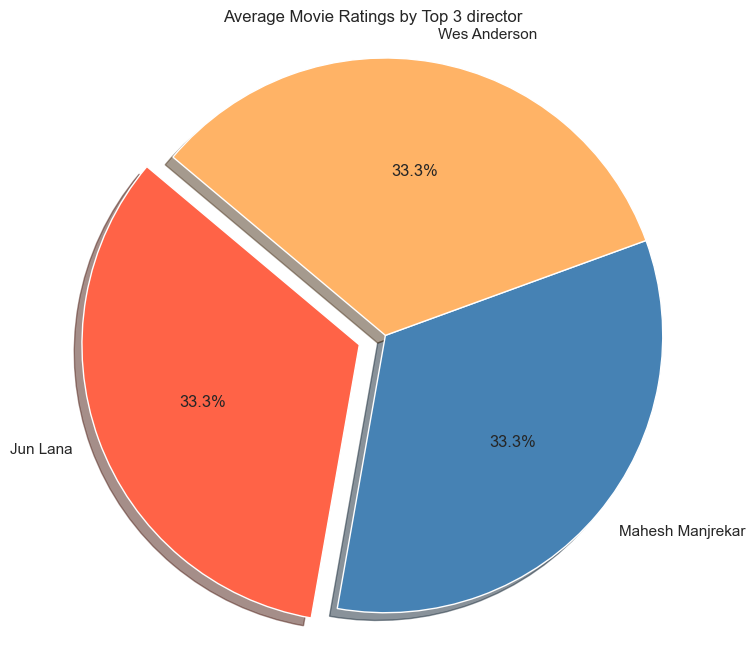

Top 3 író a legnagyobb bevételű 3 filmből:
                average_rating  box_office_revenue
writer                                           
James Cameron        6.138211        2.787965e+09
Michael Arndt        6.138211        2.068224e+09
Rick Jaffa           6.138211        1.513529e+09

Top 3 rendező a legnagyobb bevételű 3 filmből:
                  average_rating  box_office_revenue
director                                           
James Cameron          6.138211        2.787965e+09
JJ Abrams              6.138211        2.068224e+09
Colin Trevorrow        6.138211        1.513529e+09

Top 3 színész a legnagyobb bevételű 3 filmből:
                  average_rating  box_office_revenue
actor                                              
James Cameron          6.138211        2.787965e+09
JJ Abrams              6.138211        2.068224e+09
Colin Trevorrow        6.138211        1.513529e+09
Files saved successfully.


In [51]:

# CSV beolvasása
df = pd.read_csv(file_path, sep=';')

# Hiányzó értékek kiszűrése
df = df.dropna(subset=["writer", "director", "actor1", "actor2", "actor3", "average_rating", "box_office_revenue"])

# Numerikus oszlopok átalakítása
df["average_rating"] = pd.to_numeric(df["average_rating"], errors="coerce")
df["box_office_revenue"] = pd.to_numeric(df["box_office_revenue"], errors="coerce")

# Hiányzó értékek pótlása
df["average_rating"].fillna(df["average_rating"].mean(), inplace=True)
df["box_office_revenue"].fillna(df["box_office_revenue"].mean(), inplace=True)

# **Top 3 film kiválasztása** (először bevétel, majd értékelés szerint)
top_movies = df.sort_values(by=["box_office_revenue", "average_rating"], ascending=[False, False]).head(3)

# Oszlopok felbontása (explode függvény)
def explode_column(df, column_name):
    return df.assign(**{column_name: df[column_name].str.split(", ")}).explode(column_name)

# **Írók a top 3 filmből**
writers_df = explode_column(top_movies[["writer", "average_rating", "box_office_revenue"]], "writer")
top_writers = writers_df.groupby("writer").agg({"average_rating": "mean", "box_office_revenue": "mean"}).sort_values(by=["box_office_revenue", "average_rating"], ascending=[False, False])

# **Rendezők a top 3 filmből**
directors_df = explode_column(top_movies[["director", "average_rating", "box_office_revenue"]], "director")
top_directors = directors_df.groupby("director").agg({"average_rating": "mean", "box_office_revenue": "mean"}).sort_values(by=["box_office_revenue", "average_rating"], ascending=[False, False])

# **Színészek a top 3 filmből**
actors_df = top_movies.melt(id_vars=["average_rating", "box_office_revenue"], 
                            value_vars=["director"],
                            var_name="actor_type", 
                            value_name="actor").drop(columns=["actor_type"])

top_actors = actors_df.groupby("actor").agg({"average_rating": "mean", "box_office_revenue": "mean"}).sort_values(by=["box_office_revenue", "average_rating"], ascending=[False, False])

# Ensure 'average_rating' is a numeric type, coercing errors to NaN
df['average_rating'] = pd.to_numeric(df['average_rating'], errors='coerce')

# Top 3 best actors by average rating
top_3_actors = df[['director','average_rating']].dropna().sort_values(by='average_rating', ascending=False).head(3)

# Count the number of trips for weekdays and weekends
# In this case, we're counting the average rating of movies for each actor
actor_ratings = top_3_actors.groupby('director')['average_rating'].mean()


# Define labels and sizes for the pie chart
labels = actor_ratings.index
sizes = actor_ratings.values

# Define the explode values for the slices (optional)
explode_slices = (0.1, 0, 0)  # Slightly "explode" the first slice (actor)

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, explode=explode_slices, shadow=True, colors=['#ff6347', '#4682b4', '#ffb366'])
plt.title('Average Movie Ratings by Top 3 director')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Eredmények kiírása
print("Top 3 író a legnagyobb bevételű 3 filmből:\n", top_writers)
print("\nTop 3 rendező a legnagyobb bevételű 3 filmből:\n", top_directors)
print("\nTop 3 színész a legnagyobb bevételű 3 filmből:\n", top_actors)

# Fájl mentése
top_movies.to_csv("top3_highest_revenue_movies.csv", index=False)
print("Files saved successfully.")



C:\Users\rotar\AppData\Local\Temp\ipykernel_5088\3041850024.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["average_rating"].fillna(df["average_rating"].mean(), inplace=True)
C:\Users\rotar\AppData\Local\Temp\ipykernel_5088\3041850024.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

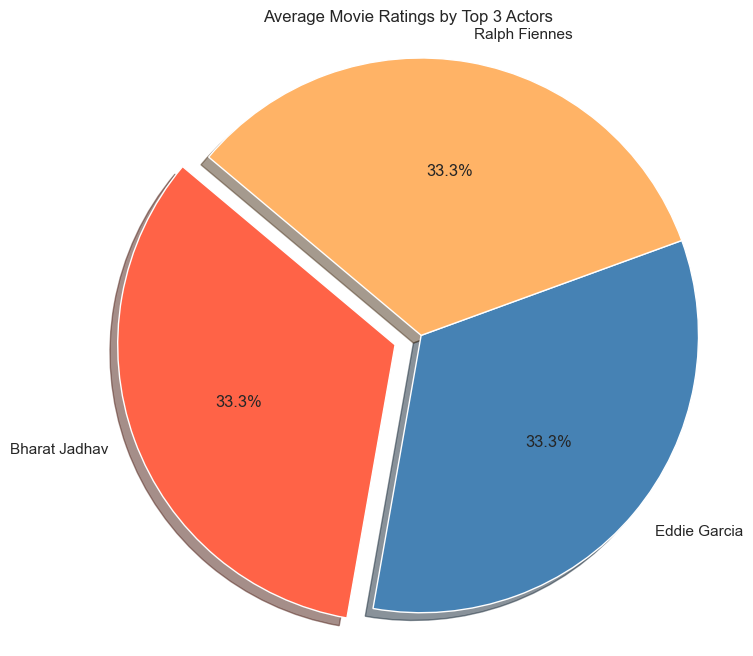

Top 3 író (bevétel alapján):
               box_office_revenue
writer                          
Graham Moore           233555708
Wes Anderson           174600318
Luke Davies            140302754

Top 3 rendező (bevétel alapján):
                box_office_revenue
director                         
Morten Tyldum           233555708
Wes Anderson            174600318
Garth Davis             140302754

Top 3 színész (értékelés alapján):
                       average_rating
actor                               
Benedict Cumberbatch             8.0
Ralph Fiennes                    8.0
Sunny Pawar                      8.0
Files saved successfully.


In [ ]:

# CSV beolvasása
df = pd.read_csv(file_path, sep=';')

# Hiányzó értékek kiszűrése
df = df.dropna(subset=["writer", "director", "actor1", "actor2", "actor3", "average_rating", "box_office_revenue"])

# Numerikus oszlopok átalakítása
df["average_rating"] = pd.to_numeric(df["average_rating"], errors="coerce")
df["box_office_revenue"] = pd.to_numeric(df["box_office_revenue"], errors="coerce")

# Hiányzó értékek pótlása
df["average_rating"].fillna(df["average_rating"].mean(), inplace=True)
df["box_office_revenue"].fillna(df["box_office_revenue"].mean(), inplace=True)

# **Top 3 film kiválasztása** (először értékelés, majd bevétel szerint)
top_movies = df.sort_values(by=["average_rating", "box_office_revenue"], ascending=[False, False]).head(3)

# Oszlopok felbontása (explode függvény)
def explode_column(df, column_name):
    return df.assign(**{column_name: df[column_name].str.split(", ")}).explode(column_name)

# **Írók a top 3 filmből (bevétel szerint)**
writers_df = explode_column(top_movies[["writer", "box_office_revenue"]], "writer")
top_writers = writers_df.groupby("writer").agg({"box_office_revenue": "sum"}).sort_values(by="box_office_revenue", ascending=False).head(3)

# **Rendezők a top 3 filmből (bevétel szerint)**
directors_df = explode_column(top_movies[["director", "box_office_revenue"]], "director")
top_directors = directors_df.groupby("director").agg({"box_office_revenue": "sum"}).sort_values(by="box_office_revenue", ascending=False).head(3)

# **Színészek a top 3 filmből (értékelés szerint)**
actors_df = top_movies.melt(id_vars=["average_rating"], 
                            value_vars=["actor1", "actor2", "actor3"],
                            var_name="actor_type", 
                            value_name="actor").drop(columns=["actor_type"])

top_actors = actors_df.groupby("actor").agg({"average_rating": "mean"}).sort_values(by="average_rating", ascending=False).head(3)

# Ensure 'average_rating' is a numeric type, coercing errors to NaN
df['average_rating'] = pd.to_numeric(df['average_rating'], errors='coerce')

# Top 3 best actors by average rating
top_3_actors = df[['actor1','average_rating']].dropna().sort_values(by='average_rating', ascending=False).head(3)

# Count the number of trips for weekdays and weekends
# In this case, we're counting the average rating of movies for each actor
actor_ratings = top_3_actors.groupby('actor1')['average_rating'].mean()

# Define labels and sizes for the pie chart
labels = actor_ratings.index
sizes = actor_ratings.values

# Define the explode values for the slices (optional)
explode_slices = (0.1, 0, 0)  # Slightly "explode" the first slice (actor)

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, explode=explode_slices, shadow=True, colors=['#ff6347', '#4682b4', '#ffb366'])
plt.title('Average Movie Ratings by Top 3 Actors')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


# Eredmények kiírása
print("Top 3 író (bevétel alapján):\n", top_writers)
print("\nTop 3 rendező (bevétel alapján):\n", top_directors)
print("\nTop 3 színész (értékelés alapján):\n", top_actors)

# Fájl mentése
top_movies.to_csv("top3_movies_with_creators.csv", index=False)
print("Files saved successfully.")
